# LHC Beam Spectrum using BBQ 

Importing and setting libraries for data (pytimber) and plots (matplotlib)

In [13]:
%matplotlib notebook
import pytimber
import matplotlib.pyplot as pl
db=pytimber.LoggingDB()

Choose time window and variables

In [2]:
t1="2016-08-08 17:57:00"
t2="2016-08-08 17:58:00"
vn=['LHC.BQBBQ.CONTINUOUS_HS.B1:ACQ_DATA_H',
    'LHC.BQBBQ.CONTINUOUS_HS.B1:ACQ_DATA_V',
    'LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_H',
    'LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_V']

In [ ]:
Getting data

In [27]:
data=db.get(vn,t1,t2)

Align and flatten acquisitions  

In [35]:
flatten={}
for name,(timestamps,values) in data.items():
    print("%s %s"%(name,values.shape))
    flatten[name]=pytimber.flattenoverlap(values)
    print("%s %s"%(name,flatten[name].shape))

LHC.BQBBQ.CONTINUOUS_HS.B1:ACQ_DATA_H (375, 2048)
Flatten: ...
average overlap 248.72 samples
LHC.BQBBQ.CONTINUOUS_HS.B1:ACQ_DATA_H (674977,)
LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_V (375, 2048)
Flatten: ...
average overlap 248.72 samples
LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_V (674978,)
LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_H (375, 2048)
Flatten: ...
average overlap 248.72 samples
LHC.BQBBQ.CONTINUOUS_HS.B2:ACQ_DATA_H (674978,)
LHC.BQBBQ.CONTINUOUS_HS.B1:ACQ_DATA_V (375, 2048)
Flatten: ...
average overlap 248.72 samples
LHC.BQBBQ.CONTINUOUS_HS.B1:ACQ_DATA_V (674977,)


Plot data

<IPython.core.display.Javascript object>


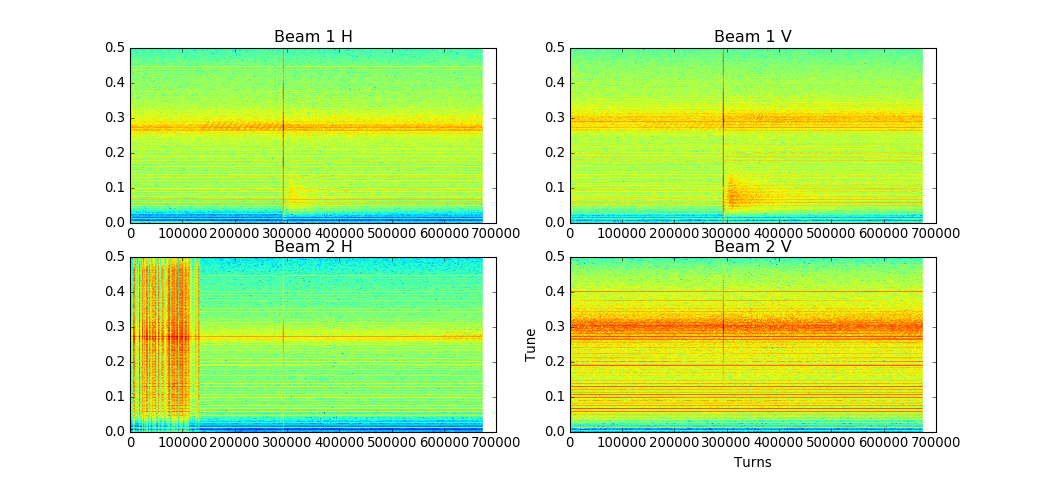

In [49]:
pl.figure(figsize=(13,6));ax=None
for iname,name in enumerate(vn):
    ax=pl.subplot(221+iname,sharex=ax)
    pl.specgram(flatten[name],Fs=1,NFFT=2048)
    pl.title("Beam %s %s"%(name[25],name[-1]))
    
pl.xlabel('Turns')
pl.ylabel('Tune')

Plot time domain detail

<IPython.core.display.Javascript object>


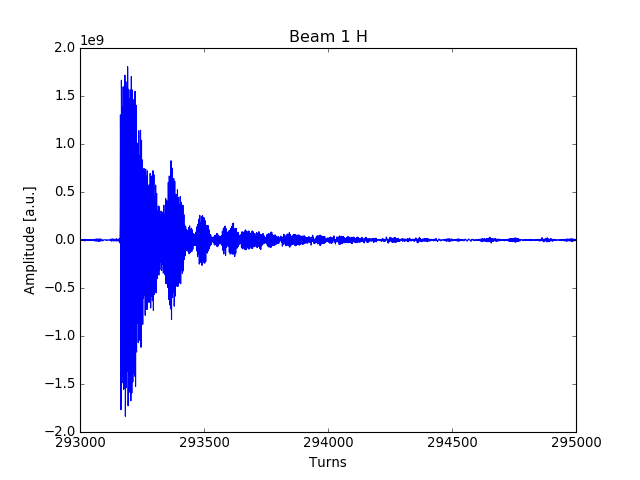

In [51]:
pl.figure()
name=vn[0]
pl.plot(flatten[name])
pl.title("Beam %s %s"%(name[25],name[-1]))
pl.xlim(293000,295000)
pl.xlabel('Turns')
pl.ylabel('Amplitude [a.u.]')